### 자기회귀 (AR, Autoregressive Model)
- 현 시점의 자료가 p시점 전의 유한개의 과거 자료로 설명될 수 있다.
- 과거의 데이터가 미래 데이터에 영향을 준다고 가정하는 모델이다.
- 현 시점의 시계열 자료에서 몇 번째 전 자료까지 영향을 주는 가를 파악하는 데에 사용한다.
- 현재 시점의 데이터가 직전 시점의 데이터에만 영향을 받는 모델을 1차 자기회귀 모형이라 하고, AR(1)로 표기한다.
- 이를 알아내기 위해서는 데이터의 패턴을 분석해야 하고, 이 때 ACF, PACF를 사용한다.
- 표준정규분포 영역 내에 들어가는 첫 번째 지점을 절단점이라고 하며, **절단점에서 1을 빼준 값**이 AR모델의 **차수**이다.

> 1. ACF  
> 만약 자기회귀 모델이라면,  
> 현재 데이터와 멀리 떨어진 과거 데이터의 영향력은 점점 줄어들기 때문에 시간이 지남에 따라 상관관계가 줄어든다.  
> <sub>예를 들어, 백년 전과 어제 중 어제의 영향력이 더 크다. 따라서, 점점 감소하는 추세가 나와야 한다.</sub>

> 2. PACF  
> 만약 자기회귀 모델이라면,
> 특정 시점 이후에 급격히 감소하는 모양이 나타난다.

- 즉, 자기회귀 모델이라면, ACF는 시차가 증가함에 따라 점차 감소하고 PACF는 특정 시점 이후 급격히 감소하여 절단된 형태를 보인다.
- 자기회귀 모델을 식별함으로써 데이터의 기본 패턴과 구조를 이해할 수 있고,  
  이를 통해 데이터가 어떻게 변동하는지, 과거 데이터가 미래에 어떤 영향을 미치는지에 대한 통찰력을 제공한다.  
<sub>*전 시점, 현 시점, 미래 시점을 모두 선형 결합하여 회귀한다.</sub>

In [1]:
import yfinance as yf

# 특정 주식 데이터 다운로드 후 데이터 프레임으로 변환
google_stock_df = yf.download('GOOG', start='2014-05-01')
# 단변량 시계열 데이터로 변환
google_stock_df = google_stock_df['Adj Close']

[*********************100%%**********************]  1 of 1 completed


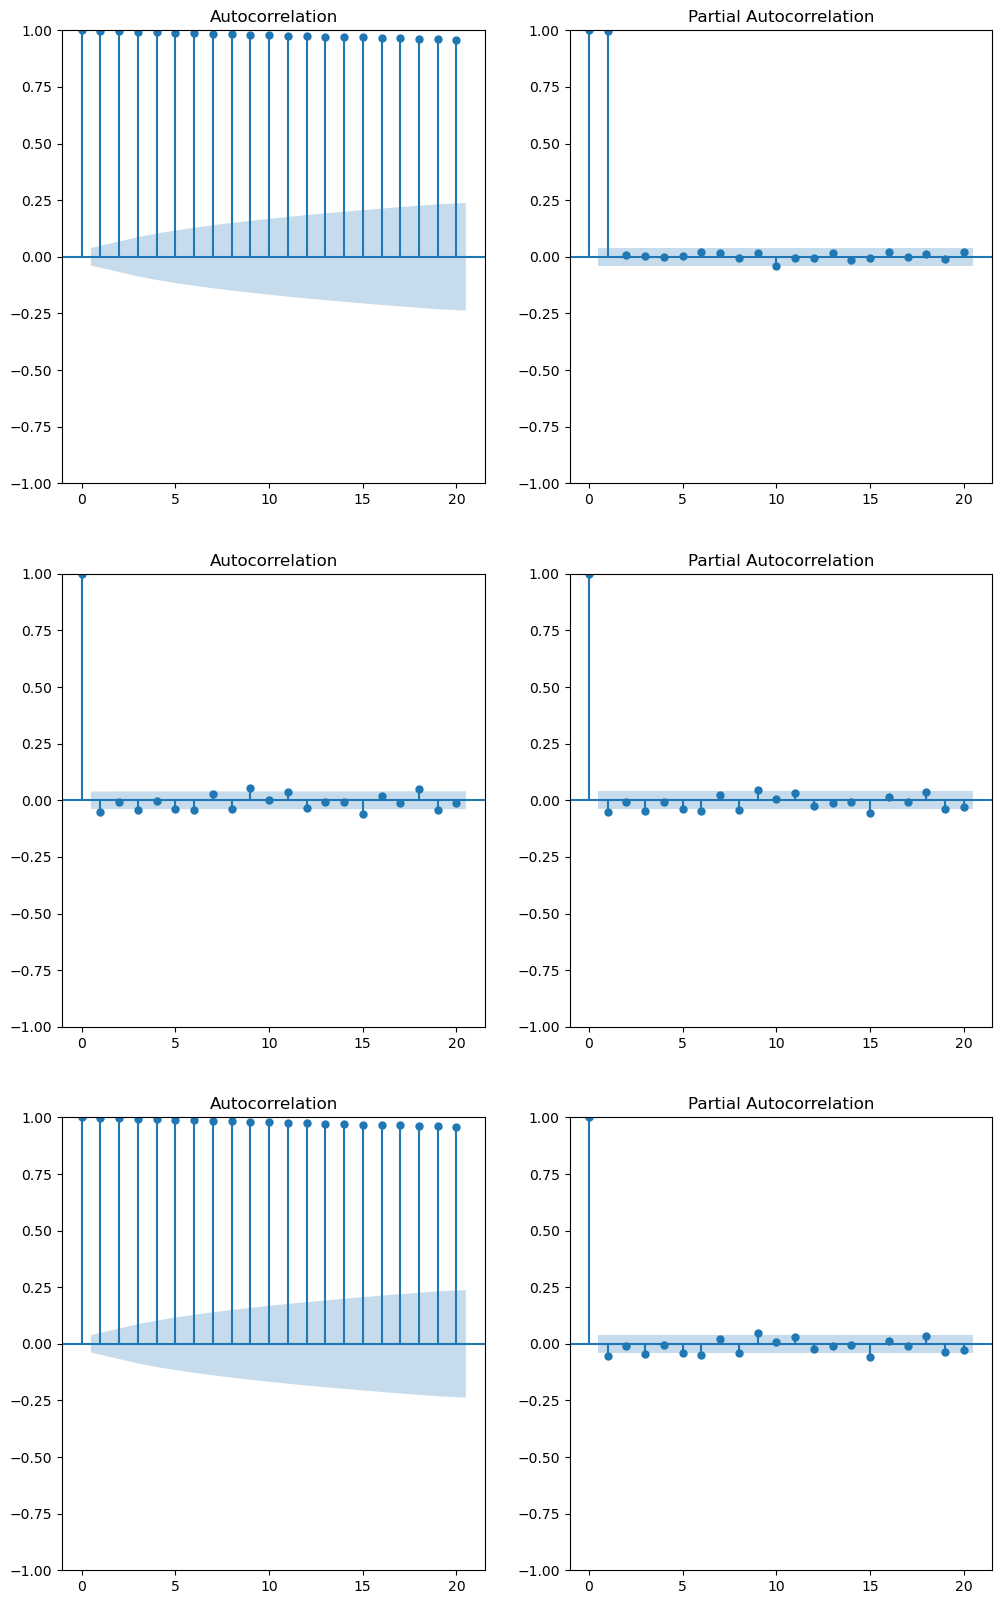

In [2]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 그래프 사이즈 지정
fig, ax = plt.subplots(3, 2, figsize=(12, 20))

# 정상성이 없는 데이터 acf, pacf 계산 및 그래프 생성
plot_acf(google_stock_df, lags=20, ax=ax[0][0])
plot_pacf(google_stock_df, lags=20, ax=ax[0][1])

# 차분된 데이터의 acf, pacf 계산 및 그래프 생성
plot_acf(google_stock_df.diff().dropna(), lags=20, ax=ax[1][0])
plot_pacf(google_stock_df.diff().dropna(), lags=20, ax=ax[1][1])

# 정상성 없는 데이터 acf, 차분된 데이터 pacf 계산 및 그래프 생성
# 해당 그래프를 중점으로 확인하기
plot_acf(google_stock_df, lags=20, ax=ax[2][0])
plot_pacf(google_stock_df.diff().dropna(), lags=20, ax=ax[2][1])


plt.show()



# ---
# 왼쪽 ACF, PACF 의 값이 거의 같다(다르긴함)

- 최종 그래프에서 왼쪽 그래프 확인 시 점점 감소하는 것을 나타내며,  
  오른쪽 그래프에서는 절단점이 나오고 2라그가 들어가는 것을 확인된다.
- 즉, 2라그 - 1 = 1으로 AR(1)이 된다.  
  절단점 - 1 = 라그 - 1 = 2 -1 = AR(1) = 1차수

- 원본에서 차분 횟수도 확인할 수 있다.  
  0에 수렴한 다음 가장 멀리 떨어진 점을 찾으면 된다.
- 0으로 부터 멀리 떨어질 수록 상관관계가 낮으며, PACF는 0에 가까워야 상관관계가 높다고 본다.

<sub>*차수(AR)는 절단점 - 1이다.
*차분 횟수는 0에 수렴한 다음 그다음 시점에서 0에서 떨어지는 것을 보기</sub>

### 이동평균 (MA, Moving Avearage)
- 일정 기간 동안의 데이터를 평균하여 시계열 데이터의 부드러운 패턴을 확인할 수 있게 해준다.
- 특정 기간 동안의 데이터를 평균한 값으로, 시계열 데이터의 일정 기간 동안의 평균을 보여준다.  
<sub>*윈도우 슬라이딩 알고리즘(stride)의 2칸 이동과 유사하다. 평균을 내서 스무딩되고 플랫해진다.</sub>
- 데이터의 변동을 부드럽게 만들어서 패턴을 파악하는 데 도움이 되며, 시계열 데이터의 추세를 이해하고 예측하는 데에 유용한 도구이다.  
<sub>*즉, 이동평균(MA) 시 라그 만큼 이동하며 평균을 구해 곡선의 형태로 나타난다.  
*이동평균 사용 시 bias에 민감하지 않기 때문에 쇼크에 대비할 수 있다.  
*예를들어, 아이스크림 가게에서 아이스크림을 팔고 여름에는 판매량이 상승한다고 가정한다.  
아이스크림 물량을 정할 때 일주일 전 판매량 1개 값만 가지고 판단하기는 어려움이 있다.  
따라서, 7일 이동 평균을 구한다. 첫째주, 둘째주, 셋째주의 평균값을 구하는 것이다.</sub>

<img src="./images/ma.jpg">

In [3]:
import yfinance as yf

# 특정 주식 데이터 다운로드 후 데이터 프레임으로 변환
google_stock_df = yf.download('GOOG', start='2014-05-01')
# 단변량 시계열 데이터로 변환
google_stock_df = google_stock_df['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [4]:
# 데이터 차분
google_stock_diff_df = google_stock_df.diff()
# NAN 값 제거
google_stock_diff_df.dropna(inplace=True)
google_stock_diff_df

Date
2014-05-02   -0.170340
2014-05-05   -0.005976
2014-05-06   -0.631048
2014-05-07   -0.257998
2014-05-08    0.051800
                ...   
2024-06-05    1.937805
2024-06-06    1.278534
2024-06-07   -2.397278
2024-06-10    0.880005
2024-06-11   -1.000000
Name: Adj Close, Length: 2545, dtype: float64

In [5]:
# 윈도우 크기 지정 (라그 수 전달)
window_size = 20

# 이동평균 계산
# rolling: 주어진 window_size(윈도우 크기)만큼의 데이터에 대해 이동평균을 계산
# mean: 각 윈도우 내의 평균을 계산하여 평탄화된 시계열 데이터 생성
moving_avg = google_stock_df.rolling(window_size).mean()
print(moving_avg)

# 차분된 데이터 이동평균 계산
moving_avg_diff = google_stock_diff_df.rolling(window_size).mean()
print(moving_avg_diff)

# 아래 있는 데이터가 차분을 했기 때문에 더 일정한 것을 확인

Date
2014-05-01           NaN
2014-05-02           NaN
2014-05-05           NaN
2014-05-06           NaN
2014-05-07           NaN
                 ...    
2024-06-05    174.771617
2024-06-06    175.130708
2024-06-07    175.348959
2024-06-10    175.675638
2024-06-11    175.921851
Name: Adj Close, Length: 2546, dtype: float64
Date
2014-05-02         NaN
2014-05-05         NaN
2014-05-06         NaN
2014-05-07         NaN
2014-05-08         NaN
                ...   
2024-06-05    0.204269
2024-06-06    0.359091
2024-06-07    0.218251
2024-06-10    0.326678
2024-06-11    0.246214
Name: Adj Close, Length: 2545, dtype: float64


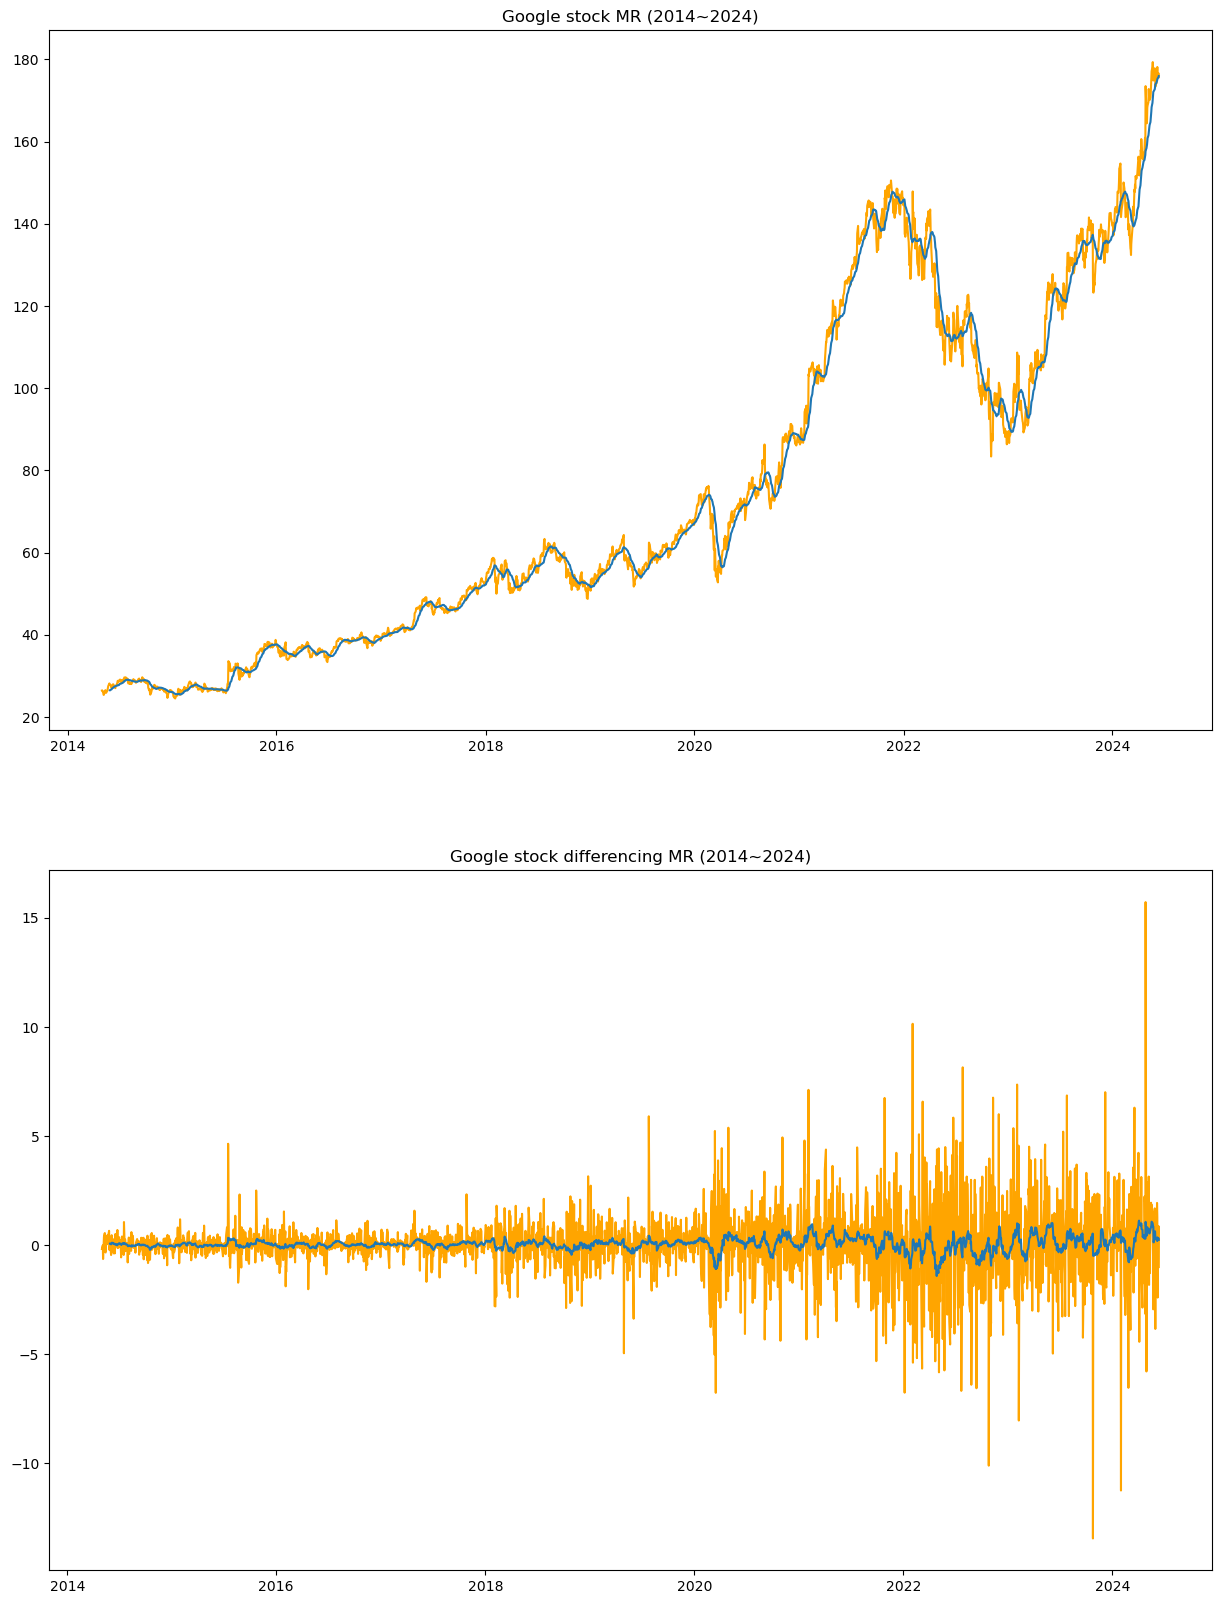

In [6]:
import matplotlib.pyplot as plt

# 사이즈 조정
plt.figure(figsize=(15, 20))

# 원본 데이터
plt.subplot(2, 1, 1)
plt.plot(google_stock_df, c='orange')

# 이동 평균 계산 데이터
plt.subplot(2, 1, 1)
plt.plot(moving_avg)

plt.title('Google stock MR (2014~2024)')

# 원본 데이터
plt.subplot(2, 1, 2)
plt.plot(google_stock_diff_df, c='orange')

# 차분 및 이동 평균 계산 데이터
plt.subplot(2, 1, 2)
plt.plot(moving_avg_diff)

plt.title('Google stock differencing MR (2014~2024)')

plt.show()

### 안정 시계열 (ARMA)
- 과거의 데이터와 최근의 평균을 사용하여 시계열 데이터의 패턴을 파악하고 예측하는 데에 사용한다.
- 2022년 3월 기준으로 ARMA가 중단되고 ARIMA로 대체되었다.  
  <sub>*알마는 정상성을 띄어야 하는데,정상성을 띈 시계열은 얼마 안되기 때문에 사용율이 떨어졌다.  
  그래서 불안정, 안정 모두 가능한 ARIMA 모델이 활성화 됐다.</sub>
- ARMA 모델은 시계열 데이터의 과거 값을 기반으로 한 선형 예측 모델이기 때문에  
  시계열 데이터가 정상성을 보이고, 예측에 영향을 주는 외부 요인이 없는 등의 가정을 만족해야 한다.
- 비정상성 데이터나 비선형적인 패턴을 갖는 데이터의 경우 패턴 파악 및 예측이 어렵다.
- ARMA(1, 0) = AR(1)
- ARMA(0, 1) = MA(1)
- ARMA(1, 1) = AR(1), MA(1)

<br></br>

### 불안정 시계열 (ARIMA)
- ARIMA(p, d, q): d차 차분한 데이터에 AR(p)모형과 MA(q)모형을 합친 모델이다.
- Autoregressive, Integrated(누적 차분), Moving Average의 세 가지 요소로 구성되어 있다.
- I는 비정상 시계열을 정상 시계열로 만들기 위해서 필요한 차분 횟수를 의미한다.  
<sub>*ARIMA의 d에 0을 주면 차분을 하지 않는다.</sub>

<br></br>

#### ○ 정리
- 시계열 데이터는 정상성을 띄고 있어야 예측이 가능하다.
- 따라서, 정상성인지 비정상인지 구분하기 위해 ACF을 사용한다.
- 비정상성을 띄고 있다면 차분하여 정상성을 띄게 해주고 PACF로 독립적인 상관관계를 확인한다.
- PACF 그래프를 확인하여 절단 값을 확인하고 절단값에 -1을 하여 AR에 넣을 차수를 결정한다.
- bias에 대비하기 위해 이동평균(MA)도 함께 사용한다.
- 여기에 성능을 더 좋게하기 위한 ARMA를 사용하는데, ARMA는 정상성을 띄는 시계열 데이터만 사용이 가능하다.
- 따라서, 차분까지 진행하는(필수X) ARIMA 모델을 사용한다. 

#### ARIMA

In [7]:
# 데이터 프레임 정보 확인
google_stock_df.info()

# 데이터 프레임의 인덱스가 DatetimeIndex 형식이어야 ARIMA 사용에 문제가 없다.

<class 'pandas.core.series.Series'>
DatetimeIndex: 2546 entries, 2014-05-01 to 2024-06-11
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
2546 non-null   float64
dtypes: float64(1)
memory usage: 39.8 KB


In [8]:
# import pandas as pd

# # 인덱스 타입 변경 (기본 index 형식 시 사)
# google_stock_df = \
# google_stock_df.reindex(pd.date_range(google_stock_df.index[0], google_stock_df.index[-1]))

In [9]:
# nall 값 확인
google_stock_df.isna().any()

False

C:\Users\LEGION\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LEGION\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LEGION\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


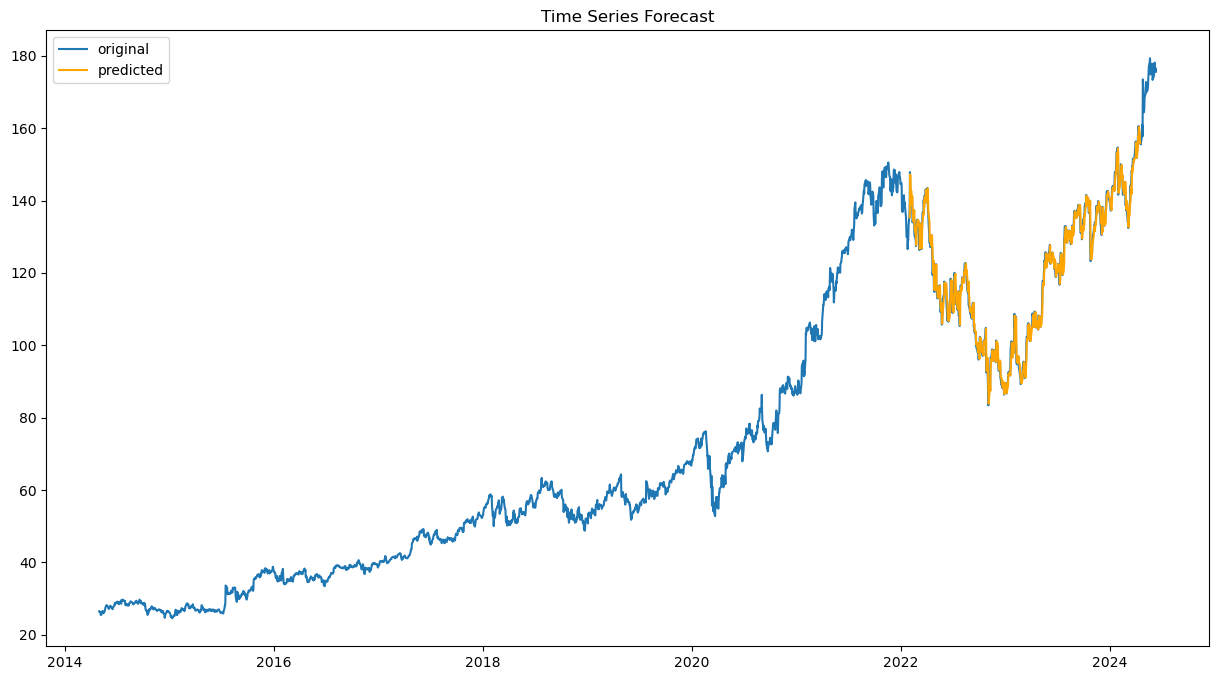

In [10]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# 모델 설정
# model = ARIMA(데이터, order=(p, d, q))
# order: 파라미터 지정 (차수, 차분, 이동평균)
# ma 값은 스무딩이 잘 될 수 있는 임의의 값을 넣어 주기
model = ARIMA(google_stock_df, order=(1, 1, 1))

# ARIMA 모델은 fit을 저장해야 함 (cnn의 history 객체와 유사)
model_fit = model.fit()

# 예측 기간 지정
# fit 시 포함되는 기간으로 지정
start_index = pd.to_datetime('2022-02-01')
end_index = pd.to_datetime('2024-04-17')
# 예측 (predict = forcast)
# 전체 훈련 후 훈련한 데이터로 예측 (test 없음)
forecast = model_fit.predict(start=start_index, end=end_index)

# 모델 평가 그래프 생성
# 예측 값이 실제 값을 잘 따라가는지 보며 모델 평가
plt.figure(figsize=(15, 8))
plt.plot(google_stock_df, label='original')
plt.plot(forecast, label='predicted', c='orange')
plt.title("Time Series Forecast")
plt.legend()
plt.show()

- train 데이터를 누적차분 하는데, 누적할 때 마지막 데이터를 통해서 바로 다음 라그는 예측이 가능하지만,  
  fit에서 업데이트를 따로 진행하지 않기 때문에 시계열에서는 train에서 test 예측이 불가하다.
  
- 시계열 데이터 모델이 예측하는 알고리즘 자체가 전 차분에 대한 다음을 예측하기 때문에 직전의 데이터가 필요하다.  
  따라서, 다음의 값을 예측하고 싶다면 이전 시점에 대한 연산 값이 필요하다.

- 그래서 n을 먼저 구하고 n + 1 하는 식으로 결과를 fit하며 업데이트한다. 즉, 업데이트를 통해 예측이 가능하다.

In [11]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# 제곱 오차 평균
# 예측 값과 실제 값의 오차 측정
mse = mean_squared_error(google_stock_df['2022-02-01':'2024-04-17'], forecast)
print("Mean Squared Error", mse)

# 평균 제곱 로그 오차
# log를 통해 백분율로 변환
msle = mean_squared_log_error(google_stock_df['2022-02-01':'2024-04-17'], forecast)
print("Mean Squared Log Error", msle)

Mean Squared Error 6.3746965676603615
Mean Squared Log Error 0.00045601305807726886
